In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np; np.random.seed(22)
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd
import math
#from mpldatacursor import HighlightingDataCursor
#from mpldatacursor import datacursor

In [2]:
ll

total 7141
drwxr-xr-x 2 rickettsia      74 Feb 22 21:09 data/
-rw-r--r-- 1 rickettsia 7035875 Feb 22 21:10 EMS_Screen.ipynb
drwxrwxr-x 2 rickettsia      75 Feb 22 20:08 Epgp4HctAmKt2IhtAmNG_Isolation_20X_02212020_3/
drwxrwxr-x 2 rickettsia      75 Feb 22 19:52 pgp4HI_20X_Iso_02212020_3/
drwxr-xr-x 2 rickettsia      22 Feb 22 20:53 test/
drwxr-xr-x 2 rickettsia      54 Feb 22 21:02 Zreduced/


In [3]:
#imports all csv files in folder and concatonates the data sets from trackmate
import glob

df = pd.DataFrame()
for filename in glob.glob('data/*.csv'):
    data_01 = pd.read_csv(filename, sep=',')
    filename = filename.split('/')[1]
    filename = filename.split('.')[0]
    well = filename.split('_')[6]
    data_01['Well'] = well.split('-')[0]
    data_01['FOV'] = filename.split('_')[7]
    data = data_01[['Frame','Track_ID', 'Well', 'FOV', 'X', 'Y', 'Channel_1', 'Channel_2']]
    df = df.append(data,  ignore_index=True)
df['Sample_ID'] = df.Well + '-' + df.FOV
df['Sample_ID'] = df.Sample_ID + '-Track-' + df.Track_ID.astype(str)

In [4]:
df

Frame  Track_ID Well FOV      X      Y    Channel_1    Channel_2  \
0       17.0       367   A2   7  682.0  430.0   317.991476   741.469366   
1       32.0       367   A2   7  682.0  428.0  1634.075120  2189.446990   
2       21.0       367   A2   7  682.0  428.0   783.976026  1727.548215   
3       22.0       367   A2   7  682.0  427.0   896.550879  1785.086841   
4       25.0       367   A2   7  682.0  425.0  1065.201385  1780.946723   
...      ...       ...  ...  ..    ...    ...          ...          ...   
28259   40.0       880   B3   4  609.0  682.0  1040.681939  1841.065530   
28260   37.0       880   B3   4  611.0  682.0  1001.372936  1719.954715   
28261   20.0       880   B3   4  612.0  682.0   292.838039   757.006393   
28262   39.0       880   B3   4  609.0  682.0  1043.613745  1798.354289   
28263   42.0       880   B3   4  609.0  682.0  1254.789025  2090.890783   

            Sample_ID  
0      A2-7-Track-367  
1      A2-7-Track-367  
2      A2-7-Track-367  
3      A2-7-Track-367  
4      A2-7-Track-367  
...               ...  
28259  B3-4-Track-880  
28260  B3-4-Track-880  
28261  B3-4-Track-880  
28262  B3-4-Track-880  
28263  B3-4-Track-880  

[28264 rows x 9 columns]

In [5]:
#subtract baseline new using min value
def subtract_bl(in_df):
    traces = in_df
    traces_p = traces.pivot_table(index='Frame', columns='Sample_ID', values='Channel_1')
    df_test2 = pd.DataFrame()
    for columns in traces_p:
        minvalue = traces_p[columns].min()
        base_sub = lambda x: x-minvalue
        df_test = in_df[in_df['Sample_ID']==columns]
        df_test['bc_channel_1'] = df_test['Channel_1']-minvalue
        df_test2 = df_test2.append(df_test)
    return df_test2
    
df_bl = subtract_bl(df)

/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
#subtract baseline new using min value
def subtract_bl(in_df):
    traces = in_df
    traces_p = traces.pivot_table(index='Frame', columns='Sample_ID', values='Channel_2')
    df_test2 = pd.DataFrame()
    for columns in traces_p:
        minvalue = traces_p[columns].min()
        base_sub = lambda x: x-minvalue
        df_test = in_df[in_df['Sample_ID']==columns]
        df_test['bc_channel_2'] = df_test['Channel_2']-minvalue
        df_test2 = df_test2.append(df_test)
    return df_test2
    
df_bl = subtract_bl(df_bl)

/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
df_bl

Frame  Track_ID Well FOV           X           Y    Channel_1  \
16018   23.0      1108   A1   0  306.537061  398.173619  1003.182206   
16019   37.0      1108   A1   0  302.467845  397.184734  2736.752264   
16020   30.0      1108   A1   0  302.488850  395.354006  2055.576452   
16021   29.0      1108   A1   0  303.162329  396.482344  1962.156100   
16022   32.0      1108   A1   0  303.053691  395.464678  2275.394779   
...      ...       ...  ...  ..         ...         ...          ...   
4130    35.0       730   B3   9   27.000000  682.000000   207.215237   
4131    19.0       730   B3   9   32.000000  682.000000   225.921151   
4132    28.0       730   B3   9   24.000000  682.000000   224.590304   
4133    37.0       730   B3   9   28.000000  682.000000   251.177411   
4134    22.0       730   B3   9   26.000000  682.000000   194.486947   

         Channel_2        Sample_ID  bc_channel_1  bc_channel_2  
16018  1236.392648  A1-0-Track-1108      0.000000      0.000000  
16019  2282.541289  A1-0-Track-1108   1733.570059   1046.148641  
16020  1957.190197  A1-0-Track-1108   1052.394246    720.797549  
16021  1850.468300  A1-0-Track-1108    958.973895    614.075653  
16022  1892.911561  A1-0-Track-1108   1272.212573    656.518913  
...            ...              ...           ...           ...  
4130    378.732552   B3-9-Track-730     21.337240     15.735216  
4131    462.129462   B3-9-Track-730     40.043154     99.132126  
4132    409.173681   B3-9-Track-730     38.712307     46.176345  
4133    417.171018   B3-9-Track-730     65.299414     54.173681  
4134    391.920618   B3-9-Track-730      8.608950     28.923282  

[28264 rows x 11 columns]

In [8]:
df_bl.to_pickle("baseLine_subtract.pkl")

In [9]:
df_bl = pd.read_pickle("baseLine_subtract.pkl")
df_f=df_bl

In [10]:
#filtering out inclusion near the edges of the field of view.
df2 = df_f[~(df_f['X']<10)]
df2 = df2[~(df2['X']>670)]
df2 = df2[~(df2['Y']<10)]
df2 = df2[~(df2['Y']>670)]
#df2 = df_f

In [11]:
df2

Frame  Track_ID Well FOV           X           Y    Channel_1  \
16018   23.0      1108   A1   0  306.537061  398.173619  1003.182206   
16019   37.0      1108   A1   0  302.467845  397.184734  2736.752264   
16020   30.0      1108   A1   0  302.488850  395.354006  2055.576452   
16021   29.0      1108   A1   0  303.162329  396.482344  1962.156100   
16022   32.0      1108   A1   0  303.053691  395.464678  2275.394779   
...      ...       ...  ...  ..         ...         ...          ...   
3816    22.0        58   B3   9  283.397519  147.809719  2130.852424   
3817    11.0        58   B3   9  284.487394  149.383026   552.201385   
3818    32.0        58   B3   9  284.607467  142.072177  3535.583910   
3819    40.0        58   B3   9  285.176634  142.280010  4835.566862   
3820     2.0        58   B3   9  282.284670  146.936733   337.233884   

         Channel_2        Sample_ID  bc_channel_1  bc_channel_2  
16018  1236.392648  A1-0-Track-1108      0.000000      0.000000  
16019  2282.541289  A1-0-Track-1108   1733.570059   1046.148641  
16020  1957.190197  A1-0-Track-1108   1052.394246    720.797549  
16021  1850.468300  A1-0-Track-1108    958.973895    614.075653  
16022  1892.911561  A1-0-Track-1108   1272.212573    656.518913  
...            ...              ...           ...           ...  
3816   2497.898775    B3-9-Track-58   1825.346297   1857.395844  
3817   1375.786894    B3-9-Track-58    246.695258    735.283964  
3818   3571.637187    B3-9-Track-58   3230.077784   2931.134257  
3819   4477.185935    B3-9-Track-58   4530.060735   3836.683005  
3820    853.925413    B3-9-Track-58     31.727757    213.422483  

[25229 rows x 11 columns]

In [12]:
#start time 12
#B = IhtA-HctA
#C = Euo-HctB

In [13]:
totalFrames = 45
startTime = 14
interval = 0.5

frame_dict = {}
for i in range(totalFrames):
    if i == 0:
        frame = i 
        frame_dict[frame] = startTime+1
    else:
        frame = i 
        startTime += interval
        frame_dict[frame] = startTime+1
#frame_dict

In [14]:
df2['Time'] = df2['Frame'].map(frame_dict)

In [15]:
#want to make a list of Sample_IDs that have signal at two time points.
df_f1 = df2['Sample_ID'][df2['Time']==25]
df_f2 = df2['Sample_ID'][df2['Time']==35]
df_f3 = df_f1[df_f1.isin(df_f2)]
df3 = df2[df2['Sample_ID'].isin(df_f3)]

In [16]:
#df3['ratio']=df3['Channel_2']/df3['Channel_1']

In [17]:
df3

Frame  Track_ID Well FOV           X           Y    Channel_1  \
15801   35.0       349   A1   0   31.814080  466.354244  2622.807672   
15802   24.0       349   A1   0   36.355709  469.910902  1452.558871   
15803   20.0       349   A1   0   38.356100  475.300553   986.068194   
15804   28.0       349   A1   0   33.952193  468.137022  1860.053809   
15805    6.0       349   A1   0   34.136335  475.176540   366.917421   
...      ...       ...  ...  ..         ...         ...          ...   
3816    22.0        58   B3   9  283.397519  147.809719  2130.852424   
3817    11.0        58   B3   9  284.487394  149.383026   552.201385   
3818    32.0        58   B3   9  284.607467  142.072177  3535.583910   
3819    40.0        58   B3   9  285.176634  142.280010  4835.566862   
3820     2.0        58   B3   9  282.284670  146.936733   337.233884   

         Channel_2       Sample_ID  bc_channel_1  bc_channel_2  Time  
15801  2453.883324  A1-0-Track-349   2304.707512   1782.310602  32.5  
15802  1751.569526  A1-0-Track-349   1134.458711   1079.996803  27.0  
15803  1587.349494  A1-0-Track-349    667.968034    915.776771  25.0  
15804  2042.279702  A1-0-Track-349   1541.953649   1370.706979  29.0  
15805   671.572722  A1-0-Track-349     48.817262      0.000000  18.0  
...            ...             ...           ...           ...   ...  
3816   2497.898775   B3-9-Track-58   1825.346297   1857.395844  26.0  
3817   1375.786894   B3-9-Track-58    246.695258    735.283964  20.5  
3818   3571.637187   B3-9-Track-58   3230.077784   2931.134257  31.0  
3819   4477.185935   B3-9-Track-58   4530.060735   3836.683005  35.0  
3820    853.925413   B3-9-Track-58     31.727757    213.422483  16.0  

[23805 rows x 12 columns]

In [18]:
# Wt = wildtype, Mt = mutant
IN    = df3[df3['Well'].str.contains("A1").fillna(False)|df3['Well'].str.contains("A2").fillna(False)|df3['Well'].str.contains("A3").fillna(False)]
            
UN    = df3[df3['Well'].str.contains("B1").fillna(False)|df3['Well'].str.contains("B2").fillna(False)|df3['Well'].str.contains("B3").fillna(False)]

In [59]:
#need new filter
# 
# Set boolean for sample ID where Max value after time of min value is > 10 frames later.
def filterII(in_df, threshold):
    traces_p =       in_df.pivot_table(index='Frame', columns='Sample_ID', values='bc_channel_2')
    df_pass = pd.DataFrame(columns=['Sample_ID', 'pass'])
    for cn in traces_p.columns:
        index_min = traces_p[cn].idxmin(axis=1, skipna=True)
        min_value = traces_p[cn].min()
        traces_p_min = traces_p[traces_p.index>=index_min]
        max_value = traces_p_min[cn].max()
        #index_max = traces_p_min[cn].idxmax(axis=1, skipna=True)
       
        if max_value > threshold*(abs(min_value)+1):
            df_pass = df_pass.append({'Sample_ID':cn, 'pass': True}, ignore_index=True)
            #print(abs(min_value)+1)
            
    new_df = pd.merge(in_df, df_pass,  how='right', on=['Sample_ID'])
    return new_df
     
IN_f=  filterII(IN,10000)
UN_f=  filterII(UN,10000)

In [60]:
IN_f

Frame  Track_ID Well FOV           X           Y    Channel_1  \
0      4.0        58   A1  11  395.707328  289.080179   317.119872   
1     28.0        58   A1  11  391.075774  268.220321  3141.692595   
2     13.0        58   A1  11  397.412731  284.958501   403.936601   
3     34.0        58   A1  11  386.235933  266.830639  4966.668620   
4      6.0        58   A1  11  394.725112  293.083282   305.309536   
..     ...       ...  ...  ..         ...         ...          ...   
107   21.0       515   A3   6   27.414507  496.195233  1048.750666   
108   32.0       515   A3   6   28.350639  486.168174  5248.438998   
109   33.0       515   A3   6   28.577431  486.192156  5691.087373   
110   26.0       515   A3   6   32.613089  492.644370  2777.808737   
111   23.0       515   A3   6   32.299733  496.197844  1579.396910   

        Channel_2       Sample_ID  bc_channel_1  bc_channel_2  Time  pass  
0      713.258391  A1-11-Track-58     11.810336     44.912094  17.0  True  
1     5300.181673  A1-11-Track-58   2836.383058   4631.835376  29.0  True  
2     1410.430474  A1-11-Track-58     98.627064    742.084177  21.5  True  
3     7046.266915  A1-11-Track-58   4661.359084   6377.920618  32.0  True  
4      766.959510  A1-11-Track-58      0.000000     98.613213  18.0  True  
..            ...             ...           ...           ...   ...   ...  
107   3892.663292  A3-6-Track-515    680.444859   1819.920085  25.5  True  
108   9698.732019  A3-6-Track-515   4880.133191   7625.988812  31.0  True  
109  10204.579116  A3-6-Track-515   5322.781566   8131.835908  31.5  True  
110   6354.174747  A3-6-Track-515   2409.502930   4281.431540  28.0  True  
111   4957.866276  A3-6-Track-515   1211.091103   2885.123069  26.5  True  

[112 rows x 13 columns]

In [61]:
def pivot(in_df, channel):
    in_df_p = in_df.pivot_table(index='Time', columns='Sample_ID', values=channel)
    #in_df_p = in_df.pivot_table(index='Time', columns='Sample_ID', values=channel)
    in_df_p['mean'], in_df_p['std'] = in_df_p.mean(axis=1), in_df_p.std(axis=1)
    return in_df_p

In [62]:
IN_IhtA_p    = pivot(IN_f,   'bc_channel_2')  
IN_HctA_p    = pivot(IN_f,   'bc_channel_1')

UN_IhtA_p    = pivot(UN_f,   'bc_channel_2')  
UN_HctA_p    = pivot(UN_f,   'bc_channel_1')


In [63]:
IN_IhtA_p

Sample_ID  A1-11-Track-58  A2-6-Track-133  A3-6-Track-515          mean  \
Time                                                                      
16.0            20.485349       30.582845             NaN     25.534097   
16.5             0.000000       77.124134             NaN     38.562067   
17.0            44.912094        0.000000             NaN     22.456047   
17.5            77.137986       94.456580             NaN     85.797283   
18.0            98.613213      186.771977             NaN    142.692595   
18.5           173.644646      271.400639             NaN    222.522643   
19.0           218.571657      272.668620             NaN    245.620139   
19.5           358.904102      340.301012             NaN    349.602557   
20.0           410.153969      422.909963             NaN    416.531966   
20.5           496.321257      472.011721             NaN    484.166489   
21.0           611.916889      484.102824             NaN    548.009856   
21.5           742.084177      681.322856        0.000000    474.469011   
22.0           917.871071      801.769845      179.801279    633.147398   
22.5          1025.125200      827.937666      462.897176    771.986681   
23.0          1226.771444      892.892381      824.874267    981.512698   
23.5          1370.806606     1101.385722     1006.449654   1159.547327   
24.0          1613.471497     1221.632925     1282.677144   1372.593855   
24.5          1771.600426     1366.801811     1813.226425   1650.542888   
25.0          2013.305807     1479.604156     1881.415557   1791.441840   
25.5          2243.633458     1706.363879     1819.920085   1923.305807   
26.0          2625.016516     1888.105487     2385.152904   2299.424969   
26.5          3043.390517     2184.509323     2885.123069   2704.340970   
27.0          3105.146510     2299.165690     3314.850293   2906.387498   
27.5          3409.380927     2530.966969     3745.214172   3228.520689   
28.0          4130.129462     2893.628130     4281.431540   3768.396377   
28.5          4259.957912     3340.562067     4730.000533   4110.173504   
29.0          4631.835376     3590.190730     5422.409164   4548.145090   
29.5          4675.731486     3634.969632     5930.443261   4747.048126   
30.0          5408.281833     4304.704848     6453.485882   5388.824188   
30.5          5900.597762     4886.168354     7205.553010   5997.439709   
31.0          6292.262653     5173.328716     7625.988812   6363.860060   
31.5          5981.893980     5544.413426     8131.835908   6552.714438   
32.0          6377.920618     5778.810336     8730.645178   6962.458711   
32.5          6818.138519     6466.347896     9757.263719   7680.583378   
33.0          7346.364944     6977.903037     9742.681939   8022.316640   
33.5          8432.928609     7609.080980    10597.353223   8879.787604   
34.0          8664.262120     8031.131060    10932.085775   9209.159652   
34.5          9294.824188     8539.526372    11275.700053   9703.350204   
35.0          9646.357485     8876.227491    12341.815663  10288.133546   
35.5         10282.717635     9415.897176    12780.533298  10826.382703   
36.0         11176.173149    10626.305807    13980.065530  11927.514829   

Sample_ID          std  
Time                    
16.0          7.140008  
16.5         54.534998  
17.0         31.757646  
17.5         12.246095  
18.0         62.337660  
18.5         69.123926  
19.0         38.252330  
19.5         13.154371  
20.0          9.019850  
20.5         17.189438  
21.0         90.378192  
21.5        412.023805  
22.0        396.877691  
22.5        285.259482  
23.0        215.105801  
23.5        189.013429  
24.0        210.827246  
24.5        246.606832  
25.0        277.994272  
25.5        283.162684  
26.0        375.860912  
26.5        457.089544  
27.0        536.220721  
27.5        627.002302  
28.0        761.339408  
28.5        706.725788  
29.0        918.971787  
29.5       1149.397382  
30.0       1074.522653  

<IPython.core.display.Javascript object>


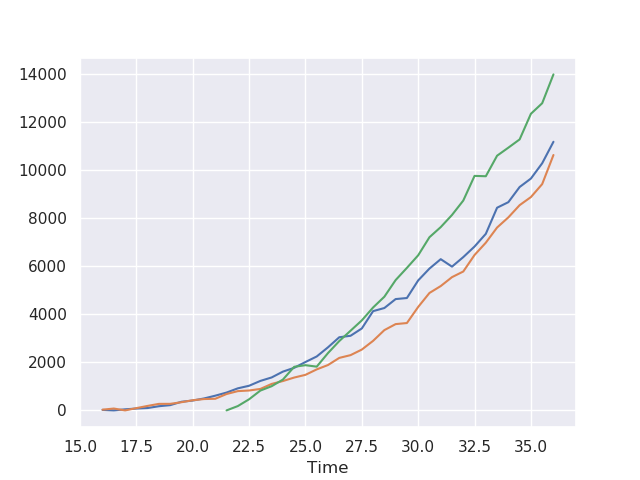

<IPython.core.display.Javascript object>


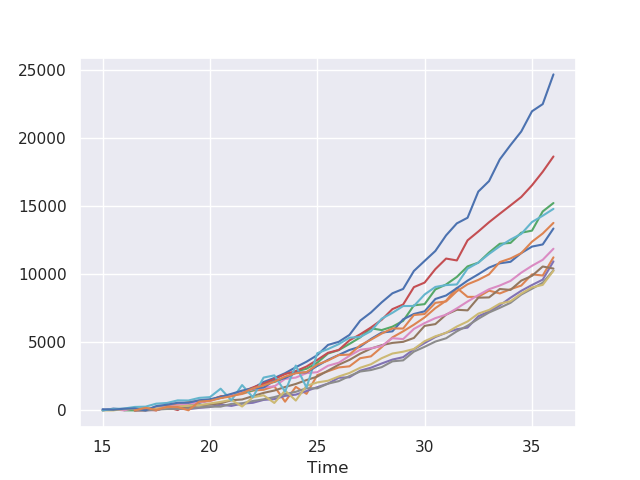

In [64]:
IN_IhtA_p.drop(columns=['std', 'mean']).plot(legend=False)
UN_IhtA_p.drop(columns=['std', 'mean']).plot(legend=False)

In [65]:
IN_IhtA_p

Sample_ID  A1-11-Track-58  A2-6-Track-133  A3-6-Track-515          mean  \
Time                                                                      
16.0            20.485349       30.582845             NaN     25.534097   
16.5             0.000000       77.124134             NaN     38.562067   
17.0            44.912094        0.000000             NaN     22.456047   
17.5            77.137986       94.456580             NaN     85.797283   
18.0            98.613213      186.771977             NaN    142.692595   
18.5           173.644646      271.400639             NaN    222.522643   
19.0           218.571657      272.668620             NaN    245.620139   
19.5           358.904102      340.301012             NaN    349.602557   
20.0           410.153969      422.909963             NaN    416.531966   
20.5           496.321257      472.011721             NaN    484.166489   
21.0           611.916889      484.102824             NaN    548.009856   
21.5           742.084177      681.322856        0.000000    474.469011   
22.0           917.871071      801.769845      179.801279    633.147398   
22.5          1025.125200      827.937666      462.897176    771.986681   
23.0          1226.771444      892.892381      824.874267    981.512698   
23.5          1370.806606     1101.385722     1006.449654   1159.547327   
24.0          1613.471497     1221.632925     1282.677144   1372.593855   
24.5          1771.600426     1366.801811     1813.226425   1650.542888   
25.0          2013.305807     1479.604156     1881.415557   1791.441840   
25.5          2243.633458     1706.363879     1819.920085   1923.305807   
26.0          2625.016516     1888.105487     2385.152904   2299.424969   
26.5          3043.390517     2184.509323     2885.123069   2704.340970   
27.0          3105.146510     2299.165690     3314.850293   2906.387498   
27.5          3409.380927     2530.966969     3745.214172   3228.520689   
28.0          4130.129462     2893.628130     4281.431540   3768.396377   
28.5          4259.957912     3340.562067     4730.000533   4110.173504   
29.0          4631.835376     3590.190730     5422.409164   4548.145090   
29.5          4675.731486     3634.969632     5930.443261   4747.048126   
30.0          5408.281833     4304.704848     6453.485882   5388.824188   
30.5          5900.597762     4886.168354     7205.553010   5997.439709   
31.0          6292.262653     5173.328716     7625.988812   6363.860060   
31.5          5981.893980     5544.413426     8131.835908   6552.714438   
32.0          6377.920618     5778.810336     8730.645178   6962.458711   
32.5          6818.138519     6466.347896     9757.263719   7680.583378   
33.0          7346.364944     6977.903037     9742.681939   8022.316640   
33.5          8432.928609     7609.080980    10597.353223   8879.787604   
34.0          8664.262120     8031.131060    10932.085775   9209.159652   
34.5          9294.824188     8539.526372    11275.700053   9703.350204   
35.0          9646.357485     8876.227491    12341.815663  10288.133546   
35.5         10282.717635     9415.897176    12780.533298  10826.382703   
36.0         11176.173149    10626.305807    13980.065530  11927.514829   

Sample_ID          std  
Time                    
16.0          7.140008  
16.5         54.534998  
17.0         31.757646  
17.5         12.246095  
18.0         62.337660  
18.5         69.123926  
19.0         38.252330  
19.5         13.154371  
20.0          9.019850  
20.5         17.189438  
21.0         90.378192  
21.5        412.023805  
22.0        396.877691  
22.5        285.259482  
23.0        215.105801  
23.5        189.013429  
24.0        210.827246  
24.5        246.606832  
25.0        277.994272  
25.5        283.162684  
26.0        375.860912  
26.5        457.089544  
27.0        536.220721  
27.5        627.002302  
28.0        761.339408  
28.5        706.725788  
29.0        918.971787  
29.5       1149.397382  
30.0       1074.522653  

In [66]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import LogLocator
c = sns.color_palette('Set1',16).as_hex()
c[1]

'#377eb8'

<IPython.core.display.Javascript object>


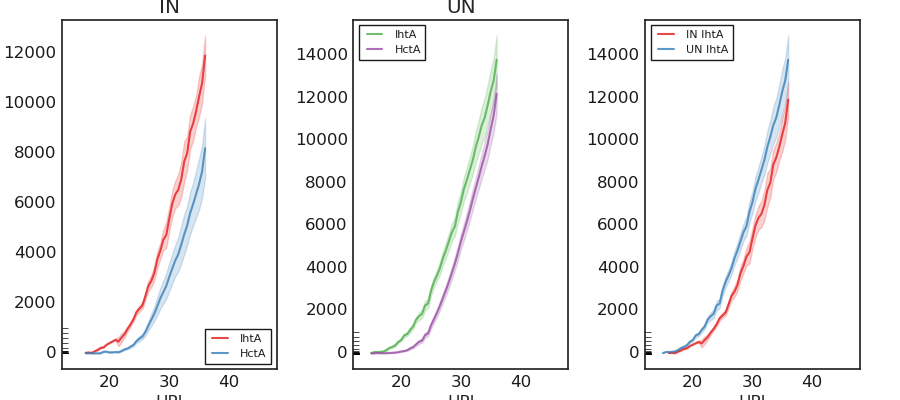

In [68]:
with plt.style.context('seaborn-white'):
    fig, (ax2,ax3,ax4) = plt.subplots(ncols=3)
    fig.tight_layout()
    

    def plot_sample_2(sample, color, name, style, mstyle, fcolor, i):
        ax2.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)     
        #ax2.fill_between(sample.index, sample['mean']-sample['std'], sample['mean']+sample['std'], color=color, alpha=0.15)
        ax2.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)
    
    
    plot_sample_2(IN_IhtA_p   , c[0],  'IhtA' , '-', '', 'None', 1)
    plot_sample_2(IN_HctA_p , c[1],   'HctA' , '-', '', 'None', 1)

       
    def plot_sample_3(sample, color, name, style, mstyle, fcolor, i):
        ax3.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)
     #    #ax1.fill_between(sample.index, sample['mean']-sample['std']-cor, sample['mean']+sample['std']-cor, color=color, alpha=0.15)
        ax3.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)    

    
    plot_sample_3(UN_IhtA_p  , c[2],   'IhtA', '-', '', 'None', 1)
    plot_sample_3(UN_HctA_p , c[3],   'HctA'  , '-', '', 'None', 1)

    
    def plot_sample_4(sample, color, name, style, mstyle, fcolor, i):
        ax4.plot(sample.index, sample['mean']*i, color, label=name, linestyle = style, marker=mstyle, alpha=0.8, ms = 5, markerfacecolor=fcolor, markeredgecolor=color, markeredgewidth=1)
          #ax1.fill_between(sample.index, sample['mean']-sample['std']-cor, sample['mean']+sample['std']-cor, color=color, alpha=0.15)
        ax4.fill_between(sample.index, sample['mean']*i-(sample['std']*i)/math.sqrt(len(sample.columns)), sample['mean']*i+(sample['std']*i)/math.sqrt(len(sample.columns)), color=color, alpha=0.2)    
    
    plot_sample_4(IN_IhtA_p   , c[0],   'IN IhtA' , '-', '', 'None', 1)
   # plot_sample_4(IN_HctA_p   , c[2],  'IN HctA'  , '-', '', 'None', 1)
    plot_sample_4(UN_IhtA_p , c[1],   'UN IhtA' , '-', '', 'None', 1)
   # plot_sample_4(UN_HctA_p , c[3],  'UN HctA'  , '-', '', 'None', 1)




with plt.style.context('classic'):
    ax2.legend(loc='lower right', fontsize=8)
    ax3.legend(loc='upper left', fontsize=8)
    ax4.legend(loc='upper left', fontsize=8)
    ax2.set_ylabel('Relative Fluorescence')
    ax2.set_xlabel('HPI')
    ax3.set_xlabel('HPI')
    ax4.set_xlabel('HPI')
    ax2.set_title('IN')
    ax3.set_title('UN')
    
  
   
    #ax2.set_yscale('symlog', linthreshy=10000)
    #ax3.set_yscale('symlog', linthreshy=1)

    
    #ax2.set_ylim([0.2, 100000])
    #ax3.set_ylim([-1000, 13000])
    #ax4.set_ylim([-1, 6000])
    #ax5.set_ylim([-50, 200])

    
    lminor = LogLocator(base=10 , subs=(0.0,0.2,0.4,0.6,0.8,1.0),numticks=10)
   
    ax2.yaxis.set_minor_locator(lminor)
    ax2.tick_params(reset= True, which='minor', length =4, direction='in', colors='black', right=False)
    ax3.yaxis.set_minor_locator(lminor)
    ax3.tick_params(reset= True, which='minor', length =4, direction='in', colors='black', right=False)
    ax4.yaxis.set_minor_locator(lminor)
    ax4.tick_params(reset= True, which='minor', length =4, direction='in', colors='black', right=False)


    ax2.set_xlim([12, 48])
    ax3.set_xlim([12, 48])
    ax4.set_xlim([12, 48])
    #ax5.set_xlim([30, 45])

   
    fig.set_size_inches(9, 4)
    #plt.savefig('Euo_HctB_PEN_Time.pdf')

In [69]:
# Calculate max, min, halfmax and time to halfmax
def halfmax(in_pd):
    in_pd_c1_p = in_pd.pivot_table(index='Sample_ID', columns='Time', values='bc_channel_1')
    in_pd_c1_p['max_c1'] = in_pd_c1_p.max(axis=1)
    in_pd_c2_p = in_pd.pivot_table(index='Sample_ID', columns='Time', values='bc_channel_2')
    in_pd_c2_p['max_c2'] = in_pd_c2_p.max(axis=1)
    #print(in_pd_c1_p)
    #in_pd_p['min'] = in_pd_p.min(axis=1)
    in_pd_c1_p['min_c1'] = 1
    in_pd_c2_p['min_c2'] = 1
    #in_pd_p['half_max'] = np.sqrt(in_pd_p['max']*in_pd_p['min'])
    #in_pd_c1_p['half_max_c1'] = np.sqrt(in_pd_c1_p['max_c1'])
    #in_pd_c2_p['half_max_c2'] = np.sqrt(in_pd_c2_p['max_c2'])
    in_pd_c1_p['half_max_c1'] = in_pd_c1_p['max_c1']/2
    in_pd_c2_p['half_max_c2'] = in_pd_c2_p['max_c2']/2
    #print(in_pd_p['half_max'])
    in_pd_f = in_pd_c1_p[['min_c1','max_c1', 'half_max_c1']]
    in_pd_f['min_c2'] = in_pd_c2_p['min_c2']
    in_pd_f['max_c2'] = in_pd_c2_p['max_c2']
    in_pd_f['half_max_c2'] = in_pd_c2_p['half_max_c2']
    in_pd_f.index.name = None
    in_pd_f['Sample_ID'] = in_pd_f.index
    #print(in_pd_c2_p['max_c2'])
    traces = in_pd
    
    traces_c1_p =       traces.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_1') 
    traces_c1_p_fill =  traces_c1_p.fillna(method='bfill') #back fill to frame 0
    traces_c1_p_fill.reset_index(inplace = True)
    df_c1_f = traces_c1_p_fill
    df_c1_f.set_index(df_c1_f['Time'], inplace=True)
    
    traces_c2_p =       traces.pivot_table(index='Time', columns='Sample_ID', values='bc_channel_2') 
    traces_c2_p_fill =  traces_c2_p.fillna(method='bfill') #back fill to frame 0
    traces_c2_p_fill.reset_index(inplace = True)
    df_c2_f = traces_c2_p_fill
    df_c2_f.set_index(df_c2_f['Time'], inplace=True)
    
    time_halfmax_c1 = pd.DataFrame(columns=['Sample_ID', 'time_to_halfmax_c1'])
    time_halfmax_c2 = pd.DataFrame(columns=['Sample_ID', 'time_to_halfmax_c2'])
    for index, row in in_pd_f.iterrows():
        sampleID = row['Sample_ID']
        #print(sampleID)
        time_c1 = (df_c1_f[sampleID]-row['half_max_c1']).abs().sort_values().index[0]
        time_c2 = (df_c2_f[sampleID]-row['half_max_c2']).abs().sort_values().index[0]
      
        time_halfmax_c1 = time_halfmax_c1.append({'Sample_ID':sampleID, 'time_to_halfmax_c1': time_c1}, ignore_index=True)
        time_halfmax_c2 = time_halfmax_c2.append({'Sample_ID':sampleID, 'time_to_halfmax_c2': time_c2}, ignore_index=True)
       
    #data_summary = pd.merge(in_pd_f, time_halfmax_c1, time_halfmax_c2, on='Sample_ID')
    data_summary = pd.merge(time_halfmax_c1, time_halfmax_c2, on='Sample_ID')
    #still need to add x y coordinates at last time imaged
    df_time = df3[df3['Time']==35]
    df_time = df_time[['Sample_ID', 'X', 'Y']]
    #want to mearge with data_summary but only for Sample IDs in both)
    result = pd.merge(data_summary, df_time, how='inner', on=['Sample_ID'])
    return result

IN_hm = halfmax(IN_f)
UN_hm = halfmax(UN_f)

/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [70]:
IN_hm

Sample_ID  time_to_halfmax_c1  time_to_halfmax_c2           X  \
0  A1-11-Track-58                31.5                30.0  387.217826   
1  A2-6-Track-133                32.0                31.0  606.760830   
2  A3-6-Track-515                31.5                30.5   29.392116   

            Y  
0  269.255357  
1  618.779443  
2  484.390667

In [71]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook, output_file
from bokeh.layouts import row
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.models import HoverTool
from collections import OrderedDict
from bokeh.layouts import layout
from bokeh.models import Toggle, BoxAnnotation, CustomJS

output_notebook()

c = sns.color_palette('Set1',1000).as_hex()

def interactive_graph(in_df):
    in_df_p = pivot(in_df, 'bc_channel_1')
    df_new = in_df_p[in_df_p.columns[0:-2]]
    result = halfmax(in_df)
    #result = in_df
    
    tools_to_show = 'box_zoom,save,hover,reset'
    p = figure(plot_height = 500, plot_width = 500,
               toolbar_location='above', tools=tools_to_show,
               # "easy" tooltips in Bokeh 0.13.0 or newer
               tooltips=[("Location","$name")])
    j=0
    for i, column in enumerate(df_new):
        trackx = result[result['Sample_ID'] == df_new.iloc[:,i].name].X.values
        tracky = result[result['Sample_ID'] == df_new.iloc[:,i].name].Y.values
        x = str(int(trackx))
        y = str(int(tracky))
        well = df_new.iloc[:,i].name.split('-')[0]
        field = df_new.iloc[:,i].name.split('-')[1]
        well = df_new.iloc[:,i].name
        name = well+', x='+x+', y='+y
        p.line(df_new.index.values, df_new.iloc[:,i].values, name = name, line_color=c[j], line_width=2.5)
        j=j+1
    p.legend.location = "top_left"
    p.legend.click_policy="mute"
    show(p)
interactive_graph(IN_f)

Loading BokehJS ...

/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/rickettsia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [72]:
Mt_hm

NameError: name 'Mt_hm' is not defined

In [73]:
##graphing with bokeh to find mouse over data
#
#from bokeh.io import push_notebook, show, output_notebook
#from bokeh.layouts import row
#from bokeh.plotting import figure
#output_notebook()
#from bokeh.plotting import figure, show, output_file
#from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
#from bokeh.models import HoverTool
#from collections import OrderedDict
#
#def spot_plot(title, in_df, color):
#    TOOLTIPS = [("ID", "@Sample_ID"), ('X', '@X'), ('Y', '@Y')]
#    p = figure(title=title, tooltips=TOOLTIPS, y_range=(20, 40), x_range=(16, 16000), plot_width=600, plot_height=300)
#    source = ColumnDataSource(in_df)
#    p.circle(x='max_c2', y='time_to_halfmax_c1', size=10, color=color, alpha=0.25, source=source)
#    show(p)
#    
#spot_plot('UN', UN_hm, 'green')
#spot_plot('IN', IN_hm, 'blue')


In [74]:
def spot_plot(title, in_df, in_df2):
    TOOLTIPS = [("ID", "@Sample_ID"), ('X', '@X'), ('Y', '@Y')]
    p = figure(title=title, tooltips=TOOLTIPS, y_range=(20, 40), x_range=(16, 35), plot_width=600, plot_height=300)
    source = ColumnDataSource(in_df)
    source2= ColumnDataSource(in_df2)
    p.circle(x='time_to_halfmax_c2', y='time_to_halfmax_c1', size=10, color='green', alpha=0.25, source=source)
    p.circle(x='time_to_halfmax_c2', y='time_to_halfmax_c1', size=10, color='blue', alpha=0.25, source=source2)
    show(p)
    
spot_plot('EMS', IN_hm, UN_hm)

In [75]:
def spot_plot(title, in_df, in_df2):
    TOOLTIPS = [("ID", "@Sample_ID"), ('X', '@X'), ('Y', '@Y')]
    p = figure(title=title, tooltips=TOOLTIPS, y_range=(20, 40), x_range=(16, 35), plot_width=600, plot_height=300)
    source = ColumnDataSource(in_df)
    source2= ColumnDataSource(in_df2)
    p.circle(x='time_to_halfmax_c2', y='time_to_halfmax_c1', size=10, color='green', alpha=0.25, source=source)
    p.circle(x='time_to_halfmax_c2', y='time_to_halfmax_c1', size=10, color='blue', alpha=0.25, source=source2)
    show(p)
    
spot_plot('EMS', Mt_hm, Wt_hm)

NameError: name 'Mt_hm' is not defined

In [76]:
Wt32

NameError: name 'Wt32' is not defined

In [77]:
#EUO vs HctB signal at 32 HPI
IN32 = IN_f[IN_f['Time']==30] #get values at 32 hours for all sample IDs
UN32 = UN_f[UN_f['Time']==30] #get values at 32 hours for all sample IDs
def spot_plot(title, in_df, in_df2):
    TOOLTIPS = [("ID", "@Sample_ID"), ('X', '@X'), ('Y', '@Y')]
    p = figure(title=title, tooltips=TOOLTIPS, x_range=(0, 12000), y_range=(0,8000), plot_width=600, plot_height=300)
    source = ColumnDataSource(in_df)
    source2= ColumnDataSource(in_df2)
    p.circle(x='bc_channel_2', y='bc_channel_1', size=10, color='green', alpha=0.25, source=source)
    p.circle(x='bc_channel_2', y='bc_channel_1', size=10, color='blue', alpha=0.25, source=source2)
    show(p)
    
spot_plot('EUO vs HctB @32 HPI', UN32, IN32)

#We should totaly animate this over time to find the outliers

In [28]:
Wt_f.sort_values('Time', inplace=True)
Mt_f.sort_values('Time', inplace=True)
Wt_f['treatment']='none'
Mt_f['treatment']='EMS'

In [29]:
df3 = pd.concat([Wt_f, Mt_f])
df3.sort_values('Time', inplace=True)

In [44]:
Wt_f['treatment']='none'
Mt_f['treatment']='EMS'

df_plot = pd.concat([Wt_f, Mt_f])
df_plot.sort_values('Time', inplace=True)

import plotly.express as px
gapminder = px.data.gapminder()
fig = px.scatter(df_plot, x="bc_channel_2", y="bc_channel_1", animation_frame="Time",
           hover_name="Sample_ID", animation_group="Sample_ID", color='treatment',
           log_x=False, size_max=85, range_x=[0, 60000], range_y=[0, 16000], color_discrete_map = {"none": 'rgba(0, 0, 255, .8)', "EMS": 'rgba(0, 255, 0, .8)'})
fig.update_traces(marker=dict(size=6))
fig.show()
#hmm need x y and time

In [191]:
import plotly.express as px
gapminder = px.data.gapminder()
px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [187]:
gapminder

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

<IPython.core.display.Javascript object>


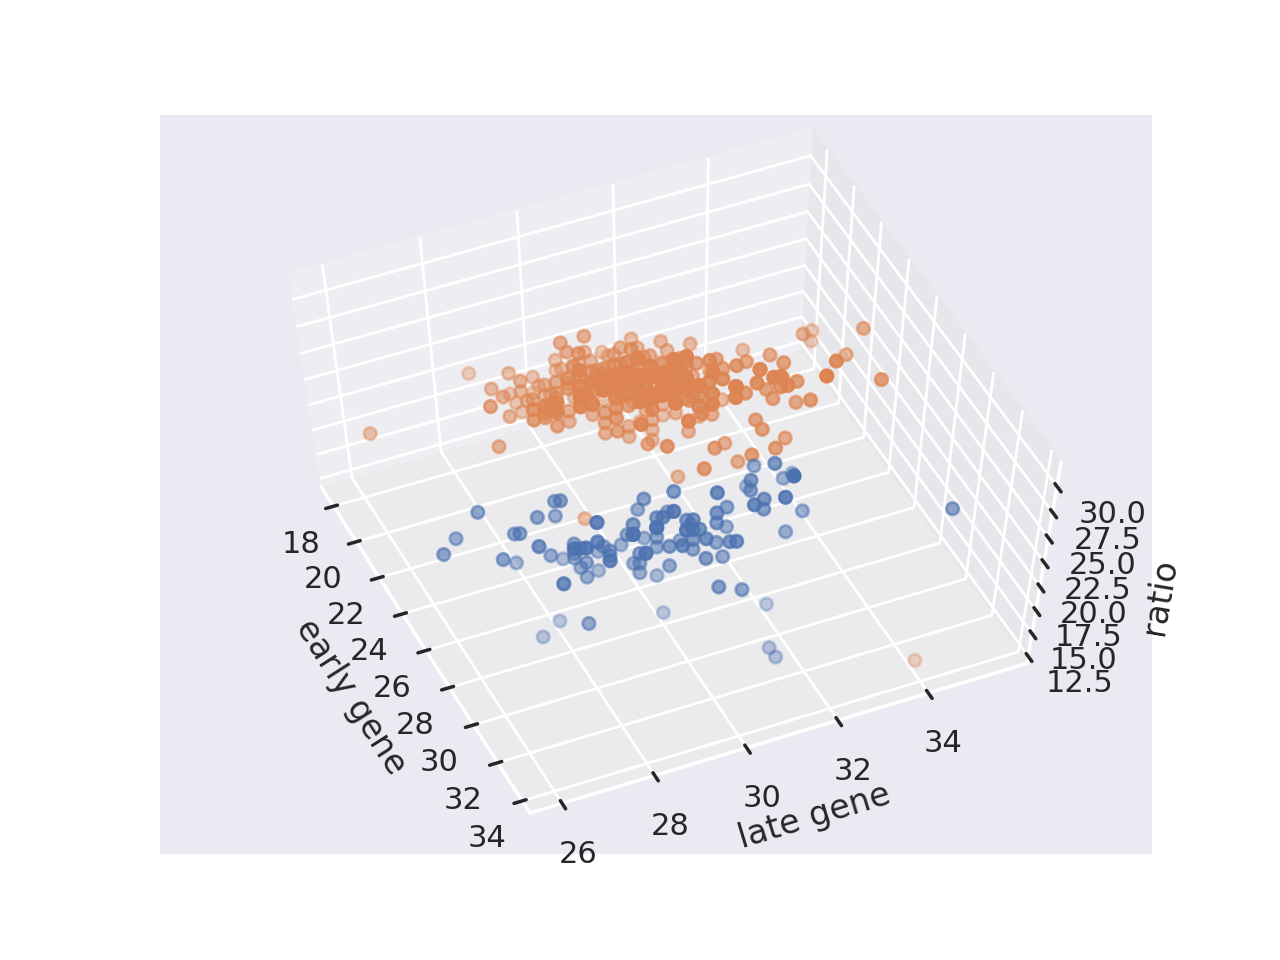

Text(0.5, 0, 'ratio')

In [89]:
from mpl_toolkits.mplot3d import Axes3D
import mplcursors

threedee = plt.figure().gca(projection='3d')
threedee.scatter(Mt_hm['time_to_halfmax_c1'], Mt_hm['time_to_halfmax_c2'], Mt_hm['time_to_ratio_min'])
threedee.scatter(Wt_hm['time_to_halfmax_c1'], Wt_hm['time_to_halfmax_c2'], Wt_hm['time_to_ratio_min'])
threedee.set_xlabel('early gene')
threedee.set_ylabel('late gene')
threedee.set_zlabel('ratio')

#lables = lables = IhtA_hm['Sample_ID']
#mplcursors.cursor(threedee).connect(
#    "add", lambda sel: sel.annotation.set_text(labels[sel.target.index]))

In [38]:
lables[1]

'B2-0ome-Track-35'